In [5]:
"""
Created on Mon Nov  4 13:54:00 2019

@author: Venkata Reddy Konasani
"""

import pandas as pd

emp_profile=pd.read_csv(r"Datasets/employee_profile.csv")

#First few rows
emp_profile.head()

#Column names 
print(emp_profile.columns)

Index(['EmpId', 'Monthly_Income', 'Monthly_Expenses',
       'Time_Spent_Reading_Books'],
      dtype='object')


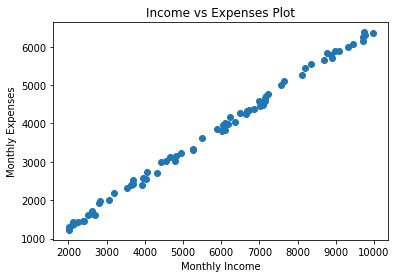

In [6]:
#Drawing the Scatter Plotq
import matplotlib.pyplot as plt
plt.scatter(emp_profile["Monthly_Income"], emp_profile["Monthly_Expenses"])
plt.title('Income vs Expenses Plot')
plt.xlabel('Monthly Income')
plt.ylabel('Monthly Expenses')
plt.show()


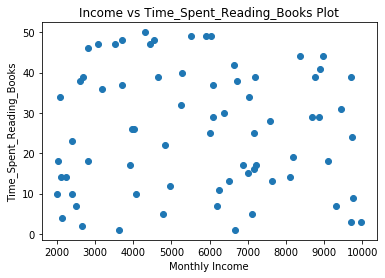

In [7]:
import matplotlib.pyplot as plt
plt.scatter(emp_profile["Monthly_Income"], emp_profile["Time_Spent_Reading_Books"])
plt.title('Income vs Time_Spent_Reading_Books Plot')
plt.xlabel('Monthly Income')
plt.ylabel('Time_Spent_Reading_Books')
plt.show()

In [8]:
#Regression Model Building
air_pass=pd.read_csv(r"Datasets/Air_Passengers.csv")

print(air_pass.columns)

Index(['Passengers_count', 'marketing_cost', 'percent_delayed_flights',
       'number_of_trips', 'customer_ratings', 'poor_weather_index',
       'percent_male_customers', 'Holiday_week', 'percent_female_customers'],
      dtype='object')


In [9]:
import statsmodels.formula.api as sm
model1 = sm.ols(formula='Passengers_count ~ marketing_cost', data=air_pass)
fitted1 = model1.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Passengers_count   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     830.0
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           4.87e-83
Time:                        14:07:24   Log-Likelihood:                -2453.4
No. Observations:                 263   AIC:                             4911.
Df Residuals:                     261   BIC:                             4918.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5186.6868    839.019      6.182      0.000    3534.579    6838.795
marketing_cost     6.3901      0.222     28.810      0.000       5.953       6.827
==============================================================================
Omnibus:                        8.874   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.679
Skew:                           0.342   Prob(JB):                      0.00791
Kurtosis:                       3.644   Cond. No.                     1.88e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
#prediction from the model
new_data=pd.DataFrame({"marketing_cost":[4500]})
print(fitted1.predict(new_data))

new_data1=pd.DataFrame({"marketing_cost":[4500,3600, 3000,5000]})
print(fitted1.predict(new_data1))

0    33942.146091
dtype: float64
0    33942.146091
1    28191.054238
2    24356.993003
3    37137.197120
dtype: float64


In [11]:
#Predictions for the data
air_pass["passengers_count_pred"]=round(fitted1.predict(air_pass))
keep_cols=["marketing_cost", "Passengers_count", "passengers_count_pred"]
air_pass[keep_cols]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Passengers_count   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     29.72
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           1.16e-07
Time:                        14:07:55   Log-Likelihood:                -2627.4
No. Observations:                 263   AIC:                             5259.
Df Residuals:                     261   BIC:                             5266.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.261e+04   1192.915     18.955      0.000    2.03e+04     2.5e+04
customer_ratings   894.4643    164.083      5.451      0.000     571.369    1217.560
==============================================================================
Omnibus:                       28.234   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.541
Skew:                           0.767   Prob(JB):                     1.92e-08
Kurtosis:                       3.944   Cond. No.                         27.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#R-Squared Value
model2 = sm.ols(formula='Passengers_count ~ customer_ratings', data=air_pass)
fitted2 = model2.fit()
fitted2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Passengers_count   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     29.72
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           1.16e-07
Time:                        14:08:05   Log-Likelihood:                -2627.4
No. Observations:                 263   AIC:                             5259.
Df Residuals:                     261   BIC:                             5266.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.261e+04   1192.915     18.955      0.000    2.03e+04     2.5e+04
customer_ratings   894.4643    164.083      5.451      0.000     571.369    1217.560
==============================================================================
Omnibus:                       28.234   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.541
Skew:                           0.767   Prob(JB):                     1.92e-08
Kurtosis:                       3.944   Cond. No.                         27.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Multiple regression
import statsmodels.formula.api as sm
model3 = sm.ols(formula='Passengers_count ~ marketing_cost+percent_delayed_flights+number_of_trips+customer_ratings+poor_weather_index+percent_female_customers+Holiday_week+percent_male_customers', data=air_pass)
fitted3 = model3.fit()
fitted3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Passengers_count   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     325.3
Date:                Mon, 05 Jul 2021   Prob (F-statistic):          8.93e-129
Time:                        14:08:16   Log-Likelihood:                -2323.3
No. Observations:                 263   AIC:                             4665.
Df Residuals:                     254   BIC:                             4697.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 4173.3041   3.71e+04      0.113      0.910   -6.88e+04    7.71e+04
marketing_cost               4.4279      0.168     26.287      0.000       4.096       4.760
percent_delayed_flights   2.187e+04   4827.398      4.530      0.000    1.24e+04    3.14e+04
number_of_trips              0.3004      0.270      1.114      0.266      -0.231       0.831
customer_ratings           546.3104     53.897     10.136      0.000     440.168     652.453
poor_weather_index        -919.5035   4520.130     -0.203      0.839   -9821.210    7982.203
percent_female_customers   -15.7188    371.808     -0.042      0.966    -747.937     716.499
Holiday_week              6804.5389    598.471     11.370      0.000    5625.942    7983.136
percent_male_customers      -7.3113    372.653     -0.020      0.984    -741.195     726.572
==============================================================================
Omnibus:                        0.087   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.957   Jarque-Bera (JB):                0.082
Skew:                           0.041   Prob(JB):                        0.960
Kurtosis:                       2.969   Cond. No.                     1.43e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# Multicollinearity
income_expenses=pd.read_csv(r"Datasets/customer_income_expenses.csv")

print(income_expenses.columns)

model4=sm.ols(formula='Monthly_Expenses ~ Monthly_Income_in_USD+Number_of_Credit_cards+Number_of_personal_loans+Monthly_Income_in_Euro', data=income_expenses)
fitted4 = model4.fit()
fitted4.summary()

Index(['id', 'Monthly_Income_in_USD', 'Number_of_Credit_cards',
       'Number_of_personal_loans', 'Monthly_Income_in_Euro',
       'Monthly_Expenses'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Monthly_Expenses   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     483.1
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           1.31e-48
Time:                        14:09:01   Log-Likelihood:                -512.77
No. Observations:                  72   AIC:                             1036.
Df Residuals:                      67   BIC:                             1047.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -72.6691    143.534     -0.506      0.614    -359.164     213.826
Monthly_Income_in_USD        7.5244    121.538      0.062      0.951    -235.066     250.115
Number_of_Credit_cards      30.2664     53.290      0.568      0.572     -76.100     136.633
Number_of_personal_loans   149.2454    104.408      1.429      0.158     -59.155     357.645
Monthly_Income_in_Euro      -7.6337    135.041     -0.057      0.955    -277.178     261.910
==============================================================================
Omnibus:                       29.413   Durbin-Watson:                   2.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.056
Skew:                           0.104   Prob(JB):                       0.0798
Kurtosis:                       1.719   Cond. No.                     4.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#Model after dropping Monthly_Income_in_USD
model5=sm.ols(formula='Monthly_Expenses ~Number_of_Credit_cards+Number_of_personal_loans+Monthly_Income_in_Euro', data=income_expenses)
fitted5 = model5.fit()
fitted5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Monthly_Expenses   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     653.7
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           4.71e-50
Time:                        14:09:25   Log-Likelihood:                -512.77
No. Observations:                  72   AIC:                             1034.
Df Residuals:                      68   BIC:                             1043.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -67.9274    120.499     -0.564      0.575    -308.379     172.524
Number_of_Credit_cards      30.1840     52.882      0.571      0.570     -75.339     135.707
Number_of_personal_loans   149.1943    103.638      1.440      0.155     -57.611     356.000
Monthly_Income_in_Euro       0.7267      0.017     43.434      0.000       0.693       0.760
==============================================================================
Omnibus:                       29.870   Durbin-Watson:                   2.600
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.071
Skew:                           0.099   Prob(JB):                       0.0792
Kurtosis:                       1.715   Cond. No.                     1.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#VIF Function 
def vif_cal(x_vars):
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)


In [19]:
#Calculating VIF values using that function
vif_cal(x_vars=income_expenses.drop(["Monthly_Expenses"], axis=1))

#Calculating VIF values after dropping Monthly_Income_in_Euro
vif_cal(x_vars=income_expenses.drop(["Monthly_Expenses","Monthly_Income_in_Euro"], axis=1))

#Calculating VIF values after dropping Monthly_Income_in_Euro and Number_of_Credit_cards
vif_cal(x_vars=income_expenses.drop(["Monthly_Expenses","Monthly_Income_in_Euro","Number_of_personal_loans"], axis=1))

#The Final model after removing all the multicollinearity 
model6=sm.ols(formula='Monthly_Expenses ~ Monthly_Income_in_USD+Number_of_Credit_cards', data=income_expenses)
fitted6 = model6.fit()
fitted6.summary()

id  VIF =  1.07
Monthly_Income_in_USD  VIF =  65007299.17
Number_of_Credit_cards  VIF =  15.94
Number_of_personal_loans  VIF =  16.15
Monthly_Income_in_Euro  VIF =  65007347.03
id  VIF =  1.06
Monthly_Income_in_USD  VIF =  1.01
Number_of_Credit_cards  VIF =  15.94
Number_of_personal_loans  VIF =  16.14
id  VIF =  1.01
Monthly_Income_in_USD  VIF =  1.0
Number_of_Credit_cards  VIF =  1.01


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Monthly_Expenses   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     964.5
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           3.71e-51
Time:                        14:10:03   Log-Likelihood:                -513.85
No. Observations:                  72   AIC:                             1034.
Df Residuals:                      69   BIC:                             1041.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -56.3653    121.148     -0.465      0.643    -298.049     185.319
Monthly_Income_in_USD      0.6522      0.015     43.134      0.000       0.622       0.682
Number_of_Credit_cards   103.7997     13.600      7.632      0.000      76.669     130.931
==============================================================================
Omnibus:                       34.625   Durbin-Watson:                   2.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.263
Skew:                           0.067   Prob(JB):                       0.0720
Kurtosis:                       1.682   Cond. No.                     2.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# Calculating VIF values for airpassengers data 
vif_cal(x_vars=air_pass.drop(["Passengers_count","passengers_count_pred"], axis=1))

#Dropped percent_male_customers due to high VIF
vif_cal(x_vars=air_pass.drop(["Passengers_count","passengers_count_pred", "percent_male_customers"], axis=1))

#Dropped percent_male_customers and percent_delayed_flights due to high VIF
vif_cal(x_vars=air_pass.drop(["Passengers_count","passengers_count_pred","percent_male_customers", "percent_delayed_flights"], axis=1))

#Model after exclusing the high VIF variables
import statsmodels.formula.api as sm
model7 = sm.ols(formula='Passengers_count ~ marketing_cost+number_of_trips+customer_ratings+poor_weather_index+percent_female_customers+Holiday_week', data=air_pass)
fitted7 = model7.fit()
fitted7.summary()

marketing_cost  VIF =  1.51
percent_delayed_flights  VIF =  13.4
number_of_trips  VIF =  1.03
customer_ratings  VIF =  1.06
poor_weather_index  VIF =  12.81
percent_male_customers  VIF =  990.52
Holiday_week  VIF =  1.21
percent_female_customers  VIF =  989.91
marketing_cost  VIF =  1.51
percent_delayed_flights  VIF =  13.34
number_of_trips  VIF =  1.03
customer_ratings  VIF =  1.06
poor_weather_index  VIF =  12.78
Holiday_week  VIF =  1.2
percent_female_customers  VIF =  1.03
marketing_cost  VIF =  1.45
number_of_trips  VIF =  1.02
customer_ratings  VIF =  1.06
poor_weather_index  VIF =  1.25
Holiday_week  VIF =  1.2
percent_female_customers  VIF =  1.01


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Passengers_count   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     401.2
Date:                Mon, 05 Jul 2021   Prob (F-statistic):          4.35e-127
Time:                        14:10:22   Log-Likelihood:                -2333.5
No. Observations:                 263   AIC:                             4681.
Df Residuals:                     256   BIC:                             4706.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 3659.6674    984.371      3.718      0.000    1721.172    5598.163
marketing_cost               4.5785      0.171     26.797      0.000       4.242       4.915
number_of_trips              0.4177      0.278      1.503      0.134      -0.130       0.965
customer_ratings           547.0027     55.782      9.806      0.000     437.152     656.853
poor_weather_index        1.855e+04   1461.863     12.691      0.000    1.57e+04    2.14e+04
percent_female_customers   -15.5571     12.302     -1.265      0.207     -39.783       8.668
Holiday_week              6802.3234    619.101     10.987      0.000    5583.144    8021.503
==============================================================================
Omnibus:                        1.354   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                1.134
Skew:                           0.154   Prob(JB):                        0.567
Kurtosis:                       3.094   Cond. No.                     5.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#Individual impact of the variables 
##Drop two variables non-impacful number_of_trips and percent_female_customers
import statsmodels.formula.api as sm
model8 = sm.ols(formula='Passengers_count ~ marketing_cost+customer_ratings+poor_weather_index+Holiday_week', data=air_pass)
fitted8 = model8.fit()
fitted8.summary()


#Drop an impactful variable
import statsmodels.formula.api as sm
model9 = sm.ols(formula='Passengers_count ~  customer_ratings+poor_weather_index+Holiday_week', data=air_pass)
fitted9 = model9.fit()
fitted9.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Passengers_count   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     145.2
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           3.44e-55
Time:                        14:10:39   Log-Likelihood:                -2511.8
No. Observations:                 263   AIC:                             5032.
Df Residuals:                     259   BIC:                             5046.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            1.45e+04   1016.979     14.257      0.000    1.25e+04    1.65e+04
customer_ratings     834.0677    106.768      7.812      0.000     623.823    1044.312
poor_weather_index  3.379e+04   2639.293     12.801      0.000    2.86e+04     3.9e+04
Holiday_week        1.223e+04   1142.371     10.705      0.000    9979.306    1.45e+04
==============================================================================
Omnibus:                        5.814   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.509
Skew:                           0.330   Prob(JB):                       0.0636
Kurtosis:                       3.257   Cond. No.                         95.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Logistic Regression

In [23]:
#product_sales Model
product_sales=pd.read_csv(r"Datasets/Product_sales.csv")
print(product_sales.columns)

import statsmodels.formula.api as sm
model10 = sm.ols(formula='Bought ~  Income', data=product_sales)
fitted10 = model10.fit()
fitted10.summary()


FileNotFoundError: [Errno 2] File b'D:\\Google Drive\\Training\\Book\\0.Chapters\\Chapter3 Regression and Logistic\\Datasets\\Product_sales.csv' does not exist: b'D:\\Google Drive\\Training\\Book\\0.Chapters\\Chapter3 Regression and Logistic\\Datasets\\Product_sales.csv'